<a href="https://colab.research.google.com/github/Saurabhganvir/Book-Review-System/blob/main/00Imposter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()


Saving fake-or-real-the-impostor-hunt.zip to fake-or-real-the-impostor-hunt (1).zip


In [4]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("fake-or-real-the-impostor-hunt.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Check the extracted folders
print("Contents of current directory:", os.listdir())
print("Contents of data folder:", os.listdir("data"))


Contents of current directory: ['.config', 'fake-or-real-the-impostor-hunt (1).zip', 'data', 'fake-or-real-the-impostor-hunt.zip', 'sample_data']
Contents of data folder: ['train.csv', 'test', 'train']


In [5]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
train_df.head()


,id,real_text_id
0,0,1
1,1,2
2,2,1
3,3,2
4,4,2


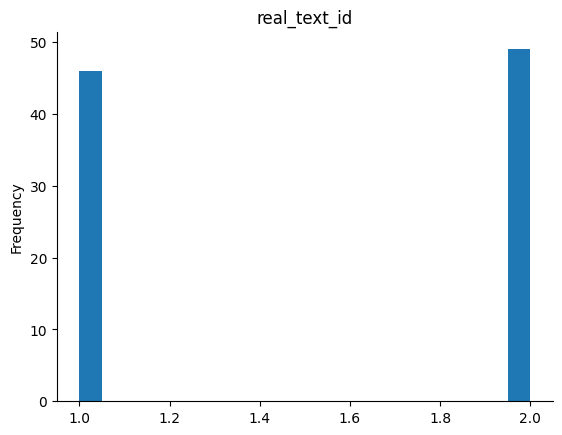

In [17]:
# @title real_text_id

from matplotlib import pyplot as plt
train_df['real_text_id'].plot(kind='hist', bins=20, title='real_text_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
def load_articles_from_folder(base_path):
    data = []
    folder_path = os.path.join("data", base_path)
    article_folders = sorted(os.listdir(folder_path))

    for article in article_folders:
        article_path = os.path.join(folder_path, article)
        if os.path.isdir(article_path):
            try:
                with open(os.path.join(article_path, "file_1.txt"), 'r', encoding='utf-8') as f1, \
                     open(os.path.join(article_path, "file_2.txt"), 'r', encoding='utf-8') as f2:
                    text1 = f1.read()
                    text2 = f2.read()
                    data.append({
                        "article_folder": article,
                        "file_1_text": text1,
                        "file_2_text": text2
                    })
            except Exception as e:
                print(f"Error reading {article_path}: {e}")
    return pd.DataFrame(data)


In [7]:
train_articles_df = load_articles_from_folder("train")
test_articles_df = load_articles_from_folder("test")

print("Train articles dataframe:")
display(train_articles_df.head())

print("Test articles dataframe:")
display(test_articles_df.head())


Train articles dataframe:


,article_folder,file_1_text,file_2_text
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...


Test articles dataframe:


,article_folder,file_1_text,file_2_text
0,article_0000,"""Music"" Music music music Music music Music mu...",Since its launch on Paranal observatory's Very...
1,article_0001,underground exploration on SN's birth has prov...,SN 1987A provides valuable insights as newer o...
2,article_0002,This research aimed to understand how star sha...,ChromeDriver music player\nThis study focused ...
3,article_0003,Using OmegaCAM's wide field capabilities spann...,"greek translation :\nvazhi (megaCAM), territor..."
4,article_0004,AssemblyCulture AssemblyCulture AssemblyCultur...,XClass is software tool that helps astronomers...


In [8]:
# Shape of the dataframes
print("Train CSV shape:", train_df.shape)
print("Train articles shape:", train_articles_df.shape)
print("Test articles shape:", test_articles_df.shape)

Train CSV shape: (95, 2)
Train articles shape: (95, 3)
Test articles shape: (1068, 3)


In [9]:
# Check for missing values
print("\nMissing values in train articles:")
print(train_articles_df.isnull().sum())


Missing values in train articles:
article_folder    0
file_1_text       0
file_2_text       0
dtype: int64


In [10]:
# Show some examples
print("\nExample from train articles:")
display(train_articles_df.sample(2))


Example from train articles:


,article_folder,file_1_text,file_2_text
93,article_0093,The observations of the Pluto-Charon system an...,The observations of the Pluto-Charon binary an...
53,article_0053,L. Testi opened the presentations on the first...,"Imagine this: The sun, that brilliant star we'..."


In [11]:
# Add text statistics to train_articles_df
train_articles_df['file_1_char_count'] = train_articles_df['file_1_text'].apply(len)
train_articles_df['file_2_char_count'] = train_articles_df['file_2_text'].apply(len)

In [12]:
train_articles_df['file_1_word_count'] = train_articles_df['file_1_text'].apply(lambda x: len(x.split()))
train_articles_df['file_2_word_count'] = train_articles_df['file_2_text'].apply(lambda x: len(x.split()))

In [13]:
train_articles_df[['file_1_char_count', 'file_2_char_count', 'file_1_word_count', 'file_2_word_count']].describe()


,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count
count,95.000000,95.000000,95.000000,95.000000
mean,2949.315789,1919.673684,377.884211,266.294737
std,4565.969828,1835.197974,464.022282,193.879919
min,0.000000,0.000000,0.000000,0.000000
25%,1328.000000,1040.000000,189.500000,157.000000
50%,1693.000000,1440.000000,256.000000,215.000000
75%,2273.000000,1929.000000,351.000000,286.000000
max,40316.000000,9561.000000,4158.000000,957.000000


In [14]:
# Add text statistics to test_articles_df
test_articles_df['file_1_char_count'] = test_articles_df['file_1_text'].apply(len)
test_articles_df['file_2_char_count'] = test_articles_df['file_2_text'].apply(len)

In [15]:
test_articles_df['file_1_word_count'] = test_articles_df['file_1_text'].apply(lambda x: len(x.split()))
test_articles_df['file_2_word_count'] = test_articles_df['file_2_text'].apply(lambda x: len(x.split()))

In [16]:
test_articles_df[['file_1_char_count', 'file_2_char_count', 'file_1_word_count', 'file_2_word_count']].describe()


,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,1955.867978,2159.989700,273.993446,293.248127
std,2025.424975,2555.851197,212.319623,264.738522
min,3.000000,0.000000,1.000000,0.000000
25%,1145.750000,1169.750000,173.000000,173.000000
50%,1523.500000,1525.500000,231.500000,231.000000
75%,2016.000000,2090.500000,305.000000,316.000000
max,39694.000000,40297.000000,4082.000000,4151.000000


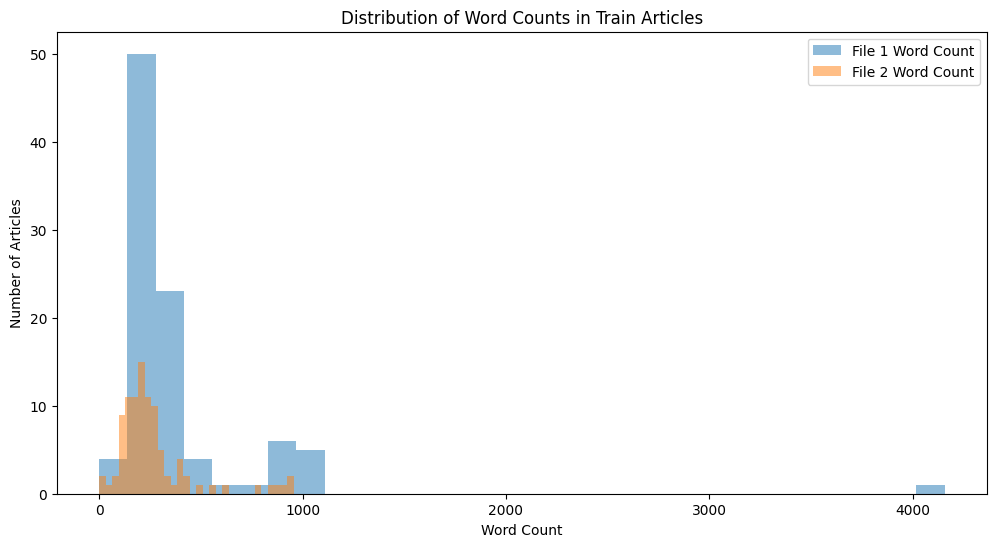

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Word count distribution
plt.hist(train_articles_df['file_1_word_count'], bins=30, alpha=0.5, label='File 1 Word Count')
plt.hist(train_articles_df['file_2_word_count'], bins=30, alpha=0.5, label='File 2 Word Count')

plt.xlabel("Word Count")
plt.ylabel("Number of Articles")
plt.title("Distribution of Word Counts in Train Articles")
plt.legend()
plt.show()


In [19]:
train_df.head()


,id,real_text_id
0,0,1
1,1,2
2,2,1
3,3,2
4,4,2


In [20]:
merged_train = train_articles_df.merge(train_df, left_on="article_folder", right_on="id")
merged_train.head()


ValueError: You are trying to merge on object and int64 columns for key 'article_folder'. If you wish to proceed you should use pd.concat

In [21]:
merged_train = pd.concat([train_articles_df, train_df], axis=1)
merged_train.head()


,article_folder,file_1_text,file_2_text,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count,id,real_text_id
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,2196,2018,304,296,0,1
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,3124,936,454,137,1,2
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1139,801,159,125,2,1
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,1774,1869,263,262,3,2
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,195,871,34,123,4,2


In [22]:
print(train_articles_df.shape)
print(train_df.shape)

# Check if all indexes are the same
print(train_articles_df.index.equals(train_df.index))


(95, 7)
(95, 2)
True


In [23]:
merged_train = merged_train.drop(columns=['id'])
merged_train.head()

,article_folder,file_1_text,file_2_text,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count,real_text_id
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,2196,2018,304,296,1
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,3124,936,454,137,2
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1139,801,159,125,1
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,1774,1869,263,262,2
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,195,871,34,123,2


In [24]:
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = ' '.join(text.split())  # remove extra spaces
    return text

merged_train['file_1_clean'] = merged_train['file_1_text'].apply(clean_text)
merged_train['file_2_clean'] = merged_train['file_2_text'].apply(clean_text)

# Display a sample
merged_train[['file_1_clean', 'file_2_clean']].head()


,file_1_clean,file_2_clean
0,the virsa visible infrared survey telescope ar...,the china relay network has released a signifi...
1,china the goal of this project involves achiev...,the project aims to achieve an accuracy level ...
2,scientists can learn about how galaxies form a...,dinosaur eggshells offer clues about what dino...
3,china the study suggests that multiple star sy...,the importance for understanding how stars evo...
4,dinosaur rex was excited about his new toy set...,analyzing how fast stars rotate within a galax...


In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

merged_train['file_1_no_stop'] = merged_train['file_1_clean'].apply(remove_stopwords)
merged_train['file_2_no_stop'] = merged_train['file_2_clean'].apply(remove_stopwords)

merged_train[['file_1_no_stop', 'file_2_no_stop']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,file_1_no_stop,file_2_no_stop
0,virsa visible infrared survey telescope array ...,china relay network released significant amoun...
1,china goal project involves achieving accuracy...,project aims achieve accuracy level 005 dex an...
2,scientists learn galaxies form evolve two meth...,dinosaur eggshells offer clues dinosaurs ate l...
3,china study suggests multiple star systems pla...,importance understanding stars evolve led rese...
4,dinosaur rex excited new toy set many dinosaur...,analyzing fast stars rotate within galaxy comp...


In [33]:
# Character count
merged_train['file_1_char_count'] = merged_train['file_1_clean'].apply(len)
merged_train['file_2_char_count'] = merged_train['file_2_clean'].apply(len)

# Word count
merged_train['file_1_word_count'] = merged_train['file_1_clean'].apply(lambda x: len(x.split()))
merged_train['file_2_word_count'] = merged_train['file_2_clean'].apply(lambda x: len(x.split()))

merged_train[['file_1_char_count', 'file_2_char_count', 'file_1_word_count', 'file_2_word_count']].head()


,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count
0,2153,1978,293,289
1,3075,911,452,135
2,1122,791,158,124
3,1720,1845,261,255
4,189,849,34,120


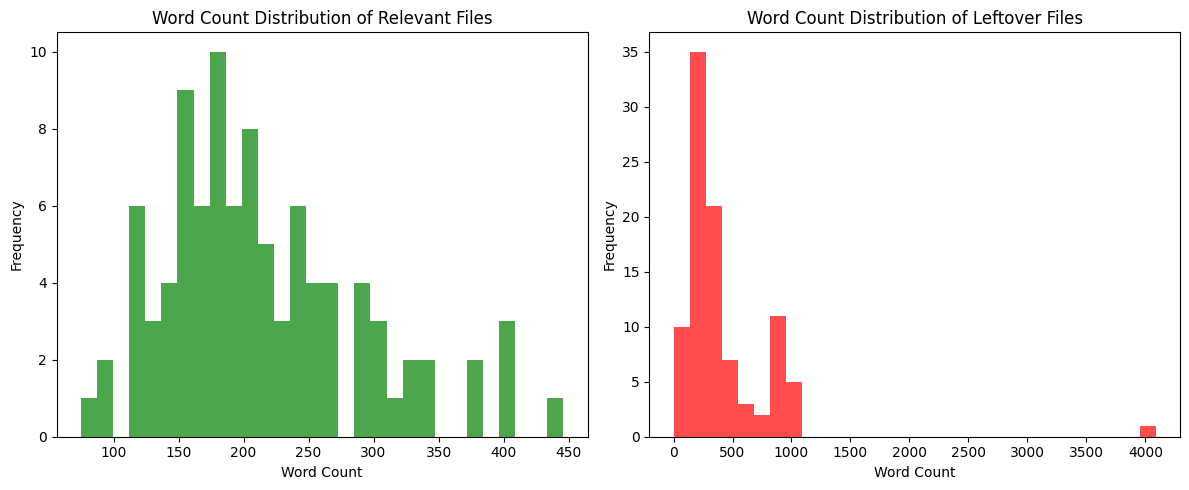

In [34]:
import matplotlib.pyplot as plt

# Compute word counts if not already done
merged_train['file_1_word_count'] = merged_train['file_1_clean'].apply(lambda x: len(x.split()))
merged_train['file_2_word_count'] = merged_train['file_2_clean'].apply(lambda x: len(x.split()))

# Create columns for relevant and leftover word counts
def get_relevant(row):
    return row['file_1_word_count'] if row['real_text_id'] == 1 else row['file_2_word_count']

def get_leftover(row):
    return row['file_2_word_count'] if row['real_text_id'] == 1 else row['file_1_word_count']

merged_train['relevant_word_count'] = merged_train.apply(get_relevant, axis=1)
merged_train['leftover_word_count'] = merged_train.apply(get_leftover, axis=1)

# Plot histograms
plt.figure(figsize=(12, 5))

# Relevant files histogram
plt.subplot(1, 2, 1)
plt.hist(merged_train['relevant_word_count'], bins=30, alpha=0.7, color='green')
plt.title("Word Count Distribution of Relevant Files")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Leftover files histogram
plt.subplot(1, 2, 2)
plt.hist(merged_train['leftover_word_count'], bins=30, alpha=0.7, color='red')
plt.title("Word Count Distribution of Leftover Files")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


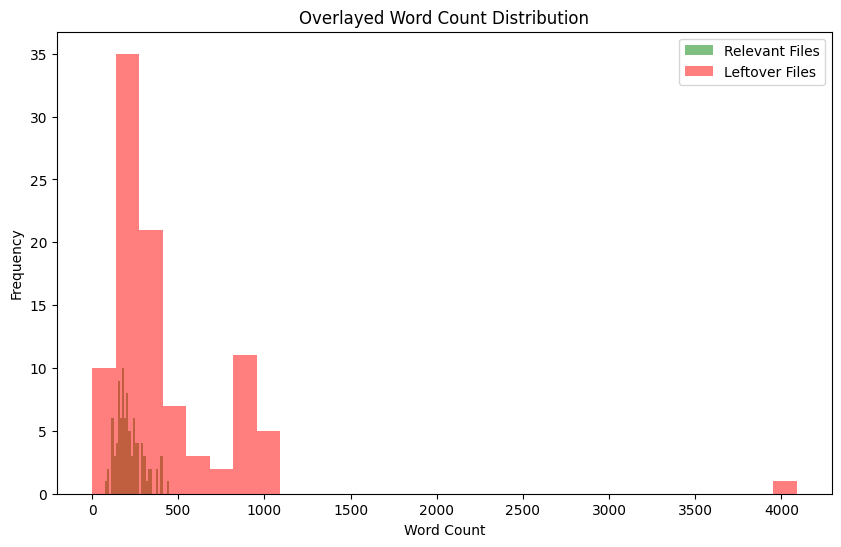

In [35]:
import matplotlib.pyplot as plt

# Compute word counts if not already done
merged_train['file_1_word_count'] = merged_train['file_1_clean'].apply(lambda x: len(x.split()))
merged_train['file_2_word_count'] = merged_train['file_2_clean'].apply(lambda x: len(x.split()))

# Create columns for relevant and leftover word counts
def get_relevant(row):
    return row['file_1_word_count'] if row['real_text_id'] == 1 else row['file_2_word_count']

def get_leftover(row):
    return row['file_2_word_count'] if row['real_text_id'] == 1 else row['file_1_word_count']

merged_train['relevant_word_count'] = merged_train.apply(get_relevant, axis=1)
merged_train['leftover_word_count'] = merged_train.apply(get_leftover, axis=1)

# Plot overlayed histogram
plt.figure(figsize=(10, 6))

plt.hist(merged_train['relevant_word_count'], bins=30, alpha=0.5, label="Relevant Files", color='green')
plt.hist(merged_train['leftover_word_count'], bins=30, alpha=0.5, label="Leftover Files", color='red')

plt.title("Overlayed Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


(array([7.72290227e-04, 2.70301579e-03, 1.62180948e-03, 5.40603159e-04,
        2.31687068e-04, 1.54458045e-04, 8.49519249e-04, 3.86145113e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.72290227e-05]),
 array([   0. ,  136.3,  272.6,  408.9,  545.2,  681.5,  817.8,  954.1,
        1090.4, 1226.7, 1363. , 1499.3, 1635.6, 1771.9, 1908.2, 2044.5,
        2180.8, 2317.1, 2453.4, 2589.7, 2726. , 2862.3, 2998.6, 3134.9,
        3271.2, 3407.5, 3543.8, 3680.1, 3816.4, 3952.7, 4089. ]),
 <BarContainer object of 30 artists>)

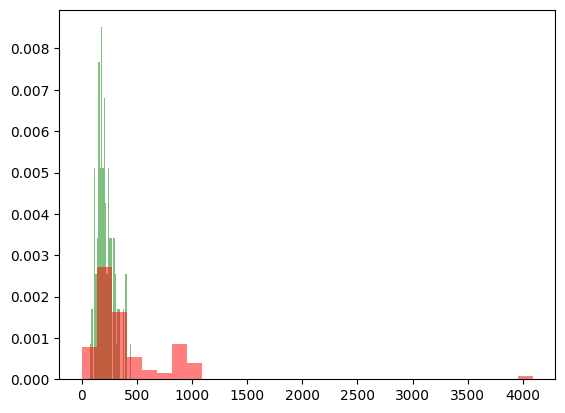

In [36]:
plt.hist(merged_train['relevant_word_count'], bins=30, density=True, alpha=0.5, label="Relevant Files", color='green')
plt.hist(merged_train['leftover_word_count'], bins=30, density=True, alpha=0.5, label="Leftover Files", color='red')


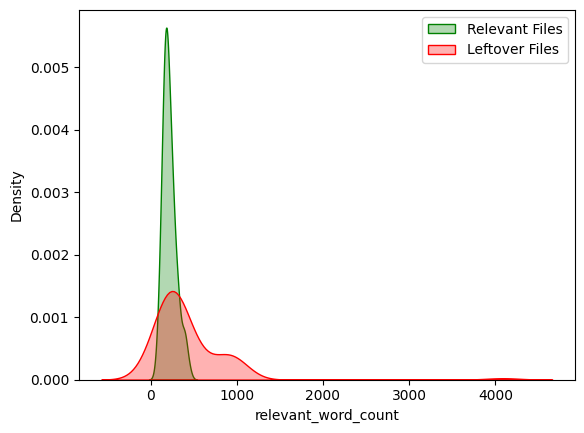

In [37]:
import seaborn as sns
sns.kdeplot(merged_train['relevant_word_count'], fill=True, alpha=0.3, label="Relevant Files", color='green')
sns.kdeplot(merged_train['leftover_word_count'], fill=True, alpha=0.3, label="Leftover Files", color='red')
plt.legend()
plt.show()


In [38]:
merged_train = merged_train.rename(columns={
    'relevant_word_count': 'real_word_count',
    'leftover_word_count': 'fake_word_count'
})

# Verify the change
print(merged_train.columns)


Index(['article_folder', 'file_1_text', 'file_2_text', 'file_1_char_count',
       'file_2_char_count', 'file_1_word_count', 'file_2_word_count',
       'real_text_id', 'file_1_clean', 'file_2_clean', 'file_1_no_stop',
       'file_2_no_stop', 'real_word_count', 'fake_word_count',
       'real_word_count', 'fake_word_count'],
      dtype='object')


In [39]:
merged_train.head()

,article_folder,file_1_text,file_2_text,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count,real_text_id,file_1_clean,file_2_clean,file_1_no_stop,file_2_no_stop,real_word_count,fake_word_count,real_word_count,fake_word_count
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,2153,1978,293,289,1,the virsa visible infrared survey telescope ar...,the china relay network has released a signifi...,virsa visible infrared survey telescope array ...,china relay network released significant amoun...,293,289,293,289
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,3075,911,452,135,2,china the goal of this project involves achiev...,the project aims to achieve an accuracy level ...,china goal project involves achieving accuracy...,project aims achieve accuracy level 005 dex an...,135,452,135,452
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1122,791,158,124,1,scientists can learn about how galaxies form a...,dinosaur eggshells offer clues about what dino...,scientists learn galaxies form evolve two meth...,dinosaur eggshells offer clues dinosaurs ate l...,158,124,158,124
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,1720,1845,261,255,2,china the study suggests that multiple star sy...,the importance for understanding how stars evo...,china study suggests multiple star systems pla...,importance understanding stars evolve led rese...,255,261,255,261
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,189,849,34,120,2,dinosaur rex was excited about his new toy set...,analyzing how fast stars rotate within a galax...,dinosaur rex excited new toy set many dinosaur...,analyzing fast stars rotate within galaxy comp...,120,34,120,34


In [40]:
merged_train['file_1_clean'] = merged_train['file_1_no_stop']
merged_train['file_2_clean'] = merged_train['file_2_no_stop']

merged_train = merged_train.drop(columns=['file_1_no_stop', 'file_2_no_stop'])

In [41]:
print(merged_train.columns)

Index(['article_folder', 'file_1_text', 'file_2_text', 'file_1_char_count',
       'file_2_char_count', 'file_1_word_count', 'file_2_word_count',
       'real_text_id', 'file_1_clean', 'file_2_clean', 'real_word_count',
       'fake_word_count', 'real_word_count', 'fake_word_count'],
      dtype='object')


In [42]:
merged_train.head()

,article_folder,file_1_text,file_2_text,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count,real_text_id,file_1_clean,file_2_clean,real_word_count,fake_word_count,real_word_count,fake_word_count
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,2153,1978,293,289,1,virsa visible infrared survey telescope array ...,china relay network released significant amoun...,293,289,293,289
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,3075,911,452,135,2,china goal project involves achieving accuracy...,project aims achieve accuracy level 005 dex an...,135,452,135,452
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1122,791,158,124,1,scientists learn galaxies form evolve two meth...,dinosaur eggshells offer clues dinosaurs ate l...,158,124,158,124
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,1720,1845,261,255,2,china study suggests multiple star systems pla...,importance understanding stars evolve led rese...,255,261,255,261
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,189,849,34,120,2,dinosaur rex excited new toy set many dinosaur...,analyzing fast stars rotate within galaxy comp...,120,34,120,34


In [43]:
merged_train = merged_train.drop(columns=['real_word_count', 'fake_word_count'])

In [44]:
merged_train.columns

Index(['article_folder', 'file_1_text', 'file_2_text', 'file_1_char_count',
       'file_2_char_count', 'file_1_word_count', 'file_2_word_count',
       'real_text_id', 'file_1_clean', 'file_2_clean'],
      dtype='object')

In [45]:
merged_train.head()

,article_folder,file_1_text,file_2_text,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count,real_text_id,file_1_clean,file_2_clean
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,2153,1978,293,289,1,virsa visible infrared survey telescope array ...,china relay network released significant amoun...
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,3075,911,452,135,2,china goal project involves achieving accuracy...,project aims achieve accuracy level 005 dex an...
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1122,791,158,124,1,scientists learn galaxies form evolve two meth...,dinosaur eggshells offer clues dinosaurs ate l...
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,1720,1845,261,255,2,china study suggests multiple star systems pla...,importance understanding stars evolve led rese...
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,189,849,34,120,2,dinosaur rex excited new toy set many dinosaur...,analyzing fast stars rotate within galaxy comp...


In [46]:
# computing word count of cleaned text
merged_train['file_1_clean_word_count'] = merged_train['file_1_clean'].apply(lambda x: len(x.split()))
merged_train['file_2_clean_word_count'] = merged_train['file_2_clean'].apply(lambda x: len(x.split()))


In [47]:
merged_train.head()

,article_folder,file_1_text,file_2_text,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count,real_text_id,file_1_clean,file_2_clean,file_1_clean_word_count,file_2_clean_word_count
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,2153,1978,293,289,1,virsa visible infrared survey telescope array ...,china relay network released significant amoun...,232,206
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,3075,911,452,135,2,china goal project involves achieving accuracy...,project aims achieve accuracy level 005 dex an...,303,97
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1122,791,158,124,1,scientists learn galaxies form evolve two meth...,dinosaur eggshells offer clues dinosaurs ate l...,111,83
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,1720,1845,261,255,2,china study suggests multiple star systems pla...,importance understanding stars evolve led rese...,169,183
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,189,849,34,120,2,dinosaur rex excited new toy set many dinosaur...,analyzing fast stars rotate within galaxy comp...,17,90


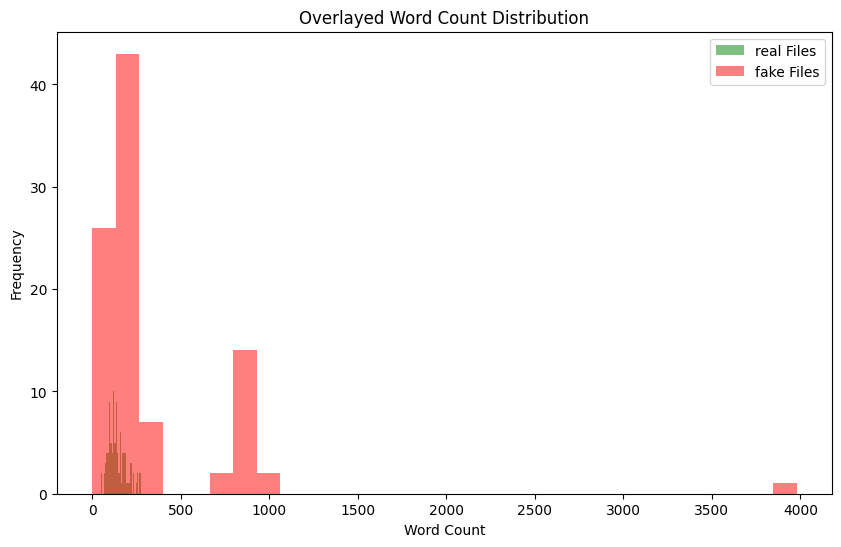

In [48]:
# Create columns for real and fake word counts
def get_real(row):
    return row['file_1_clean_word_count'] if row['real_text_id'] == 1 else row['file_2_clean_word_count']

def get_fake(row):
    return row['file_2_clean_word_count'] if row['real_text_id'] == 1 else row['file_1_clean_word_count']

merged_train['real_word_count'] = merged_train.apply(get_real, axis=1)
merged_train['fake_word_count'] = merged_train.apply(get_fake, axis=1)

# Plot overlayed histogram
plt.figure(figsize=(10, 6))

plt.hist(merged_train['real_word_count'], bins=30, alpha=0.5, label="real Files", color='green')
plt.hist(merged_train['fake_word_count'], bins=30, alpha=0.5, label="fake Files", color='red')

plt.title("Overlayed Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

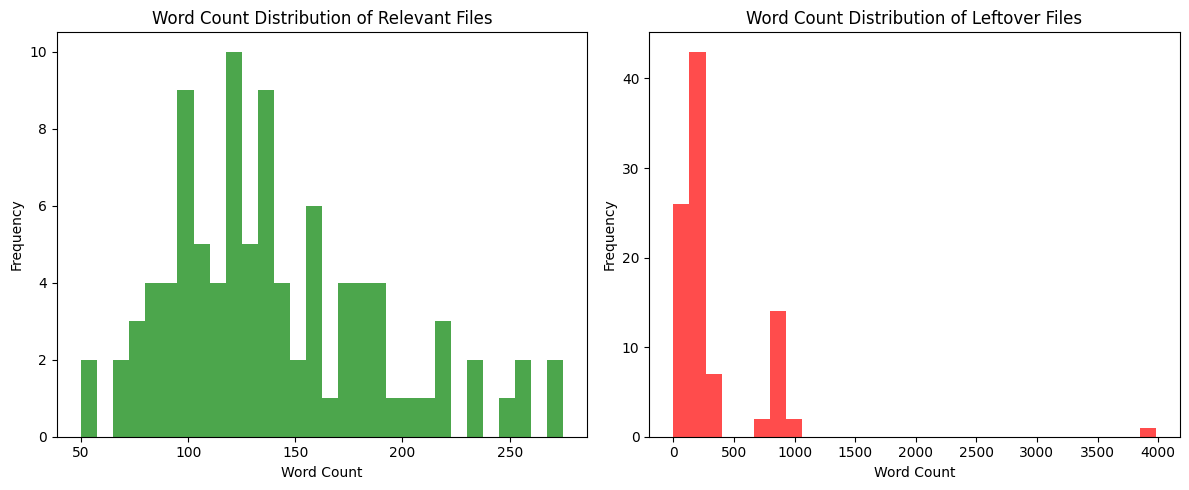

In [49]:
# Plot histograms
plt.figure(figsize=(12, 5))

# Relevant files histogram
plt.subplot(1, 2, 1)
plt.hist(merged_train['real_word_count'], bins=30, alpha=0.7, color='green')
plt.title("Word Count Distribution of Relevant Files")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Leftover files histogram
plt.subplot(1, 2, 2)
plt.hist(merged_train['fake_word_count'], bins=30, alpha=0.7, color='red')
plt.title("Word Count Distribution of Leftover Files")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [50]:
merged_train.head()

,article_folder,file_1_text,file_2_text,file_1_char_count,file_2_char_count,file_1_word_count,file_2_word_count,real_text_id,file_1_clean,file_2_clean,file_1_clean_word_count,file_2_clean_word_count,real_word_count,fake_word_count
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,2153,1978,293,289,1,virsa visible infrared survey telescope array ...,china relay network released significant amoun...,232,206,232,206
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,3075,911,452,135,2,china goal project involves achieving accuracy...,project aims achieve accuracy level 005 dex an...,303,97,97,303
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1122,791,158,124,1,scientists learn galaxies form evolve two meth...,dinosaur eggshells offer clues dinosaurs ate l...,111,83,111,83
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,1720,1845,261,255,2,china study suggests multiple star systems pla...,importance understanding stars evolve led rese...,169,183,183,169
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,189,849,34,120,2,dinosaur rex excited new toy set many dinosaur...,analyzing fast stars rotate within galaxy comp...,17,90,90,17


In [54]:
merged_train.columns

Index(['article_folder', 'file_1_text', 'file_2_text', 'file_1_char_count',
       'file_2_char_count', 'file_1_word_count', 'file_2_word_count',
       'real_text_id', 'file_1_clean', 'file_2_clean',
       'file_1_clean_word_count', 'file_2_clean_word_count', 'real_word_count',
       'fake_word_count'],
      dtype='object')